Customer Segmentation Analysis

This project segments e-commerce customers using clustering to support targeted marketing and strategic decisions.


In [3]:
import pandas as pd
df = pd.read_csv("ifood_df.csv")
df.head()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


* Step 1: Load and Preview the Dataset

In this step, I imported the pandas library and loaded the ifood_df.csv dataset using the read_csv() function. I then displayed the first five rows using .head() to check that the data loaded correctly.

The dataset contains 39 columns and includes information such as:
- Income, Kidhome, Teenhome – customer demographics  
- Recency, MntWines, MntFruits, etc. – purchase behavior across product categories  
- MntTotal, AcceptedCmpOverall – total spending and campaign response

This confirms that the dataset is successfully loaded and ready for further analysis.


In [4]:
df.info()
df.isnull().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


* Step 2: Explore the Dataset

In this step, I used df.info(), df.isnull().sum(), and df.describe() to understand the structure of the dataset.

- df.info() showed that there are 2205 entries and 39 columns, with no missing values.
- df.isnull().sum() confirmed that all columns are complete and contain no null values.
- df.describe() provided summary statistics like mean, min, and max for each numerical column. This helped identify the range and distribution of values in features such as Income, Age, Recency, and product spending.

This basic exploration confirms the dataset is clean and ready for analysis.


In [5]:
df['TotalSpend'] = df[['MntWines','MntFruits','MntMeatProducts',
                       'MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)


* Step 3: Create a Total Spending Feature

In this step, I created a new column called TotalSpend by summing up the amounts customers spent on different product categories: wines, fruits, meat, fish, sweets, and gold products.

This combined value gives a clearer picture of each customer's overall monetary value, which will be useful for segmentation and identifying high-value customers.


In [7]:
# 1. Recency → Already exists 3rd column as 'Recency'

# 2. Frequency → Total number of accepted campaigns
df['Frequency'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                      'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1)

# 3. Monetary → Sum of all product purchases (already in 'MntTotal')
df['Monetary'] = df['MntTotal']


* Step 4: Create RFM Features for Segmentation

To prepare for customer segmentation, I constructed RFM (Recency, Frequency, Monetary) features:

1. Recency: Already exists as the column 'Recency', representing days since the last purchase.
2. Frequency: Created a new column by summing all accepted campaigns (AcceptedCmp1–5 and Response). This indicates how often a customer engages with marketing offers.
3. Monetary: Used the existing 'MntTotal' column to represent the total amount spent by each customer.

These features help capture how recently, how frequently, and how much each customer spends — essential for clustering.


C:\Users\govin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\govin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\govin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\govin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\govin\anaconda3\lib\site-packages\sklearn\clust

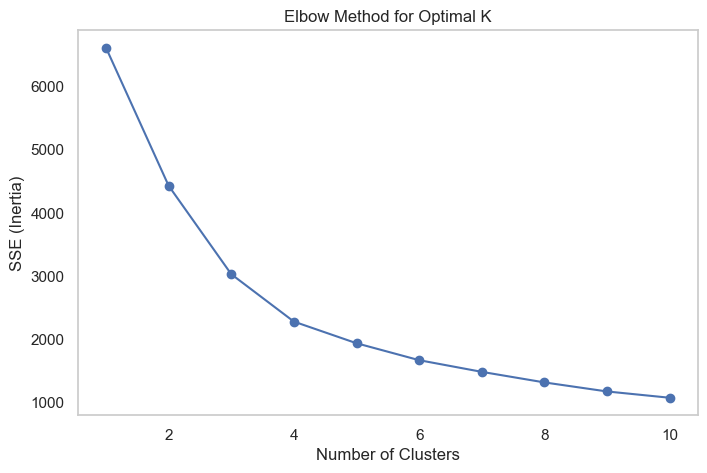

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Scale the RFM features
scaler = StandardScaler()
scaled_rfm = scaler.fit_transform(df[['Recency', 'Frequency', 'Monetary']])

# Elbow method to find optimal K
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_rfm)
    sse.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE (Inertia)")
plt.grid()
plt.show()


*  Step 5: Scale Features and Find Optimal Number of Clusters (Elbow Method)

To prepare the RFM features for clustering, I scaled them using StandardScaler. This ensures all features contribute equally by transforming them to a standard range.

Then, I used the Elbow Method to find the best value for K (number of clusters). I ran KMeans clustering for K values from 1 to 10 and calculated the SSE (sum of squared errors) for each.

By plotting these SSE values, I created the Elbow Curve. The "elbow point" in the curve helps identify the ideal number of clusters — where increasing K further doesn't reduce SSE significantly.


In [10]:
from sklearn.cluster import KMeans

# Apply KMeans with K = 4
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_rfm)

# See number of customers in each cluster
print(df['Cluster'].value_counts())


2    759
0    752
1    500
3    194
Name: Cluster, dtype: int64


*  Step 6: Apply KMeans Clustering

In this step, I applied the KMeans algorithm with 4 clusters (K=4), as identified from the Elbow Method.

Using the scaled RFM features, I fit the model and assigned a cluster label (0 to 3) to each customer. This label is stored in a new column called 'Cluster'.

Finally, I printed the number of customers in each cluster to see how the dataset was divided among the four segments.


In [11]:
df.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(2)


,Recency,Frequency,Monetary
Cluster,,,
0,73.78,0.13,203.91
1,55.31,0.33,1225.27
2,21.56,0.25,261.31
3,44.12,2.79,1425.68


*  Step 7: Analyze Cluster Characteristics

In this step, I calculated the average Recency, Frequency, and Monetary values for each customer segment (cluster).

By grouping the dataset by 'Cluster' and taking the mean of RFM features, I was able to understand the typical behavior of each customer group. This helps in profiling the segments — for example, identifying which cluster contains high-value or loyal customers.


#### Customer Segmentation Insights

Using RFM analysis and K-Means clustering (k=4), we identified four distinct customer groups:

1. Cluster 0: Inactive Low Spenders**
   - High recency (73.78 days), very low frequency and spend
   - Strategy: Reactivate through aggressive promotions or win-back campaigns.

2. Cluster 1: Occasional High Spenders**
   - Moderate recency, spend a lot but not frequently
   - Strategy: Encourage frequent purchases using loyalty programs or bundling.

3. Cluster 2: New or Recently Active Users**
   - Very recent activity (recency ~21 days), moderate spend
   - Strategy: Build loyalty early via personalized offers and follow-ups.

4. Cluster 3: Loyal High-Value Customers**
   - Low recency, very frequent and high spenders
   - Strategy: Prioritize retention. Offer VIP benefits and upselling opportunities.

* These insights help in designing targeted marketing strategies that match each segment's behavior and value.


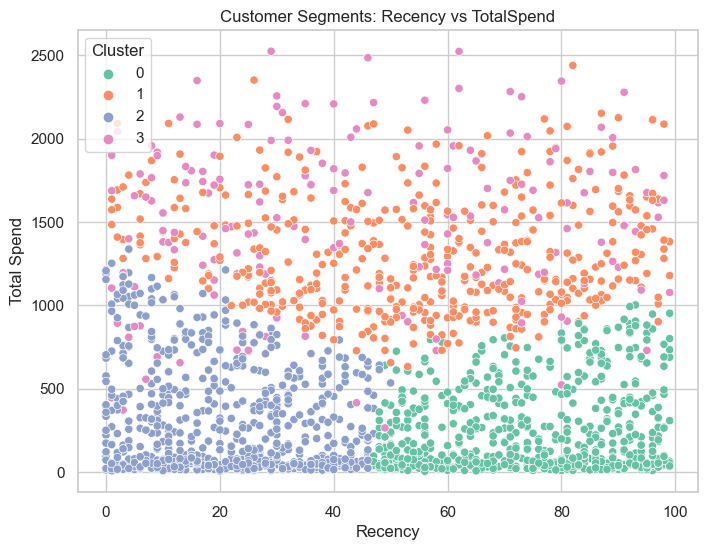

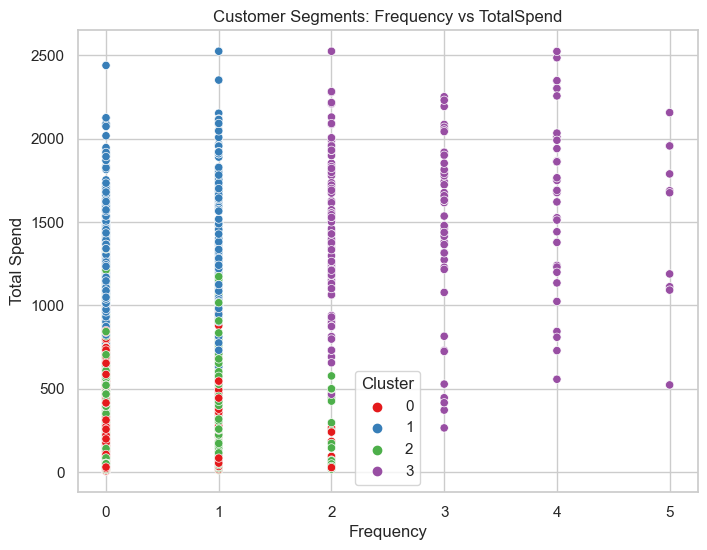

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# 2D Scatter plot of Recency vs Monetary
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Recency', y='TotalSpend', hue='Cluster', palette='Set2')
plt.title('Customer Segments: Recency vs TotalSpend')
plt.xlabel('Recency')
plt.ylabel('Total Spend')
plt.show()

# 2D Scatter plot of Frequency vs Monetary
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Frequency', y='TotalSpend', hue='Cluster', palette='Set1')
plt.title('Customer Segments: Frequency vs TotalSpend')
plt.xlabel('Frequency')
plt.ylabel('Total Spend')
plt.show()


* Step 8: Visualize Customer Segments

I created 2D scatter plots to visualize how customer segments differ based on RFM values:

1. Recency vs Total Spend – helps identify recent and high-spending customers
2. Frequency vs Total Spend – helps identify frequent buyers and their spending levels

Coloring the points by cluster reveals how each segment behaves and helps validate the clustering visually.
